<a href="https://colab.research.google.com/github/yun890503/house_prices/blob/main/house_prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


<ipython-input-50-aca2ed6fd505>:110: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['GarageYrBlt'] = test_data['GarageYrBlt'].fillna(test_data['GarageYrBlt'].mean())
<ipython-input-50-aca2ed6fd505>:111: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['MasVnrArea'] = test_data['MasVnrArea'].fillna(test_data['MasVnrArea'].mean())
<ipython-input-50-aca2ed6fd505>:112: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_index

線性回歸
平均絕對誤差: 0.2910540797178433
均方誤差: 0.2999575602451759
均方根誤差: 0.5476838141164808
-----------------------------------------------------------------------------------------------------
GradientBoostingRegressor
平均絕對誤差: 0.22754923914285172
均方誤差: 0.1163946595284639
均方根誤差: 0.34116661549522087
-----------------------------------------------------------------------------------------------------
決策樹
平均絕對誤差: 0.3327904077116327
均方誤差: 0.2297983841710415
均方根誤差: 0.4793729072142496
-----------------------------------------------------------------------------------------------------
支持向量機
平均絕對誤差: 0.23401679589999025
均方誤差: 0.1899647870349416
均方根誤差: 0.43584950044131243
-----------------------------------------------------------------------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
<ipython-input-50-aca2ed6fd505>:229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfr.fit(X_train, y_train)


隨機樹森林
平均絕對誤差: 0.23703690775791916
均方誤差: 0.1527604273940172
均方根誤差: 0.390845784669628
-----------------------------------------------------------------------------------------------------
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_sampl

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
lightgbm
平均絕對誤差: 0.2455253639480578
均方誤差: 0.16102005209619802
均方根誤差: 0.4012730393338157
-----------------------------------------------------------------------------------------------------


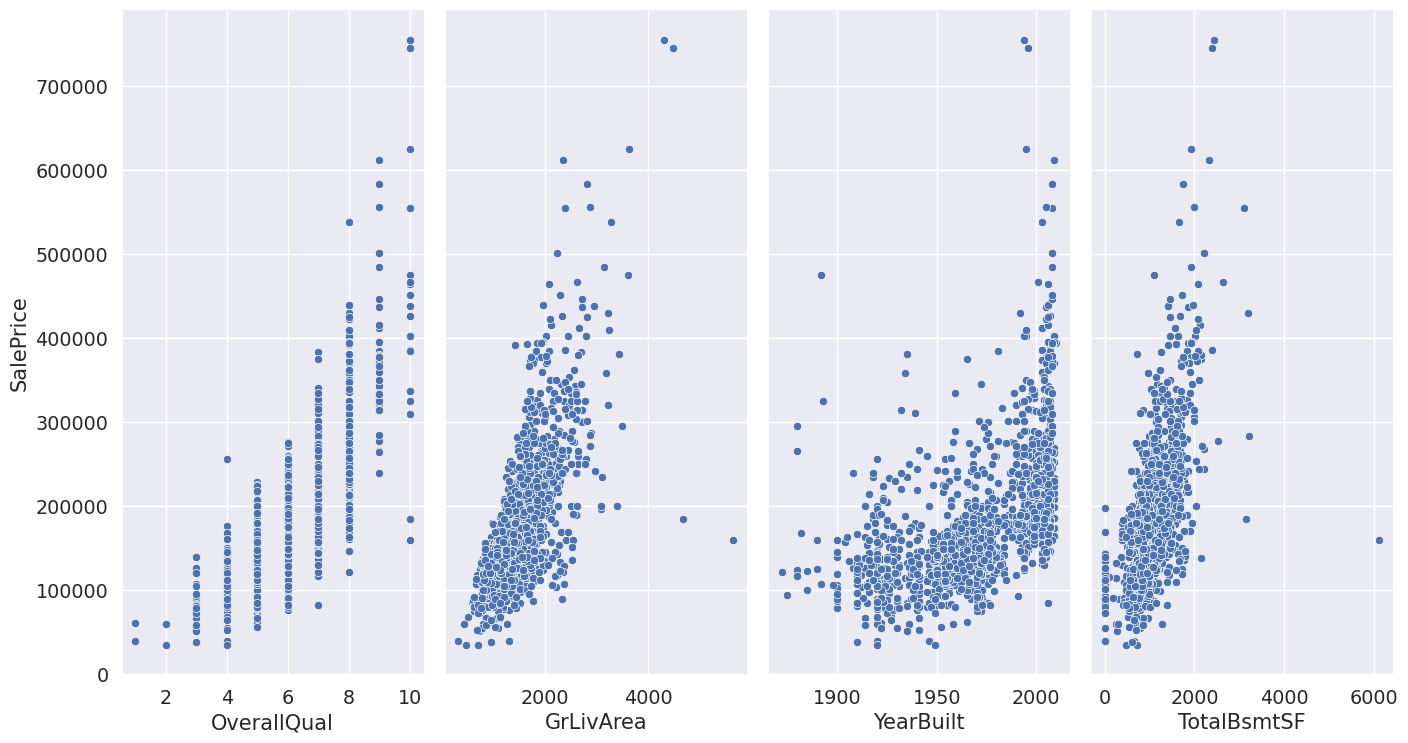

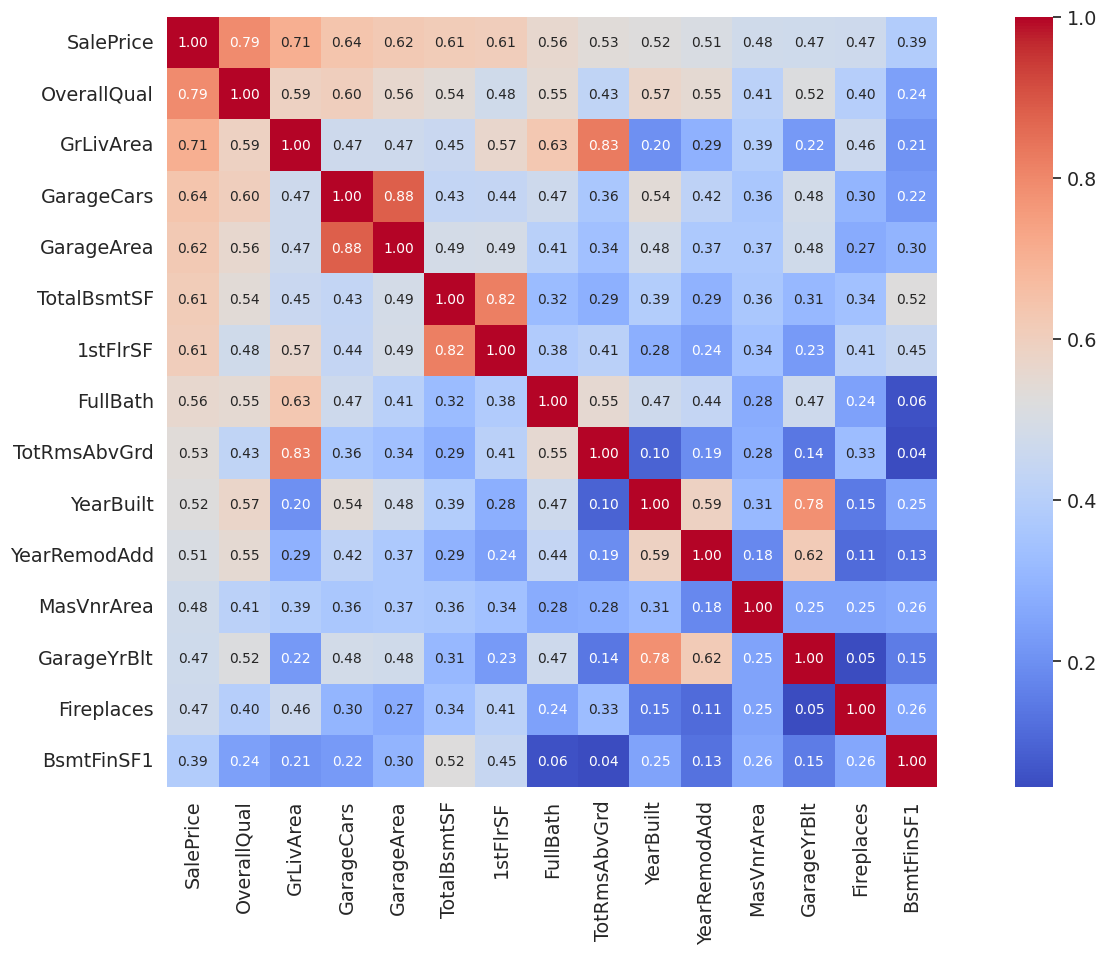

In [50]:
import numpy as np
import pandas as pd
from google.colab import files
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive

# 連接到Google Drive
drive.mount('/content/gdrive')

train_data = pd.read_csv('/content/gdrive/My Drive/house prices/train.csv')
# print(train_data)
test_data = pd.read_csv('/content/gdrive/My Drive/house prices/test.csv')
train_data.head()
test_data.head()
train_data.dtypes.value_counts()
train_data.select_dtypes('object').head()
def MissingValue(df):
    miss_value = df.isnull().sum()
    miss_percentage = miss_value / df.shape[0]
    miss_df = pd.concat([miss_value, miss_percentage], axis=1)
    miss_df = miss_df.rename(columns={0:'MissingValue',1:'%MissingPercent'})
    miss_df = miss_df.loc[miss_df['MissingValue']!=0, :]
    miss_df = miss_df.sort_values(by='%MissingPercent', ascending = False)
    return miss_df
MissingValue(train_data)
MissingValue(test_data)
train_data.select_dtypes(['int64','float64']).columns
# train_data.select_dtypes(['int64','float64']).shape(1460, 38)

import seaborn as sns
g = sns.pairplot(x_vars=['OverallQual', 'GrLivArea', 'YearBuilt', 'TotalBsmtSF'], y_vars=['SalePrice'], data=train_data,dropna=True)
g.fig.set_size_inches(15,10)

import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

box_1, box_2, box_3, box_4 = train_data['OverallQual'], train_data['GrLivArea'], train_data['YearBuilt'], train_data['TotalBsmtSF']
labels = 'OverallQual', 'GrLivArea', 'YearBuilt', 'TotalBsmtSF'

# plt.figure(figsize=(8,8))
# plt.title("特征数据箱型分布图", fontproperties='YOUYUAN', fontsize=20)
# # plt.xlabel(fontproperties='Consolas', fontsize=15, color='green')
# plt.ylabel('Distribution', fontproperties='Consolas',fontsize=15, color='red')
# plt.boxplot([box_1, box_2, box_3, box_4], showfliers=True, showmeans=True, sym='*', labels=labels)
# plt.show

# plt.figure(figsize=(30,15))
# sns.heatmap(train_data.corr(),cmap='coolwarm',annot = True)
# # plt.show()

# 數據處理
train_data = train_data.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu'], axis=1)
test_data = test_data.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu'], axis=1)
# train_data.shape
# (1460, 76)
# test_data.shape
# (1459, 75)

# 類別特徵轉換成數字編碼
categorical_feature_mask = train_data.dtypes==object
categorical_cols = train_data.columns[categorical_feature_mask].tolist()

from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
train_data[categorical_cols] = train_data[categorical_cols].apply(lambda col: labelencoder.fit_transform(col.astype(str)))
# train_data


categorical_feature_mask_test = test_data.dtypes==object
categorical_cols_test = test_data.columns[categorical_feature_mask_test].tolist()
test_data[categorical_cols_test] = test_data[categorical_cols_test].apply(lambda col:labelencoder.fit_transform(col.astype(str)))
# test_data

# MissingValue(train_data)
# MissingValue(test_data)

# 均值填充
train_data['LotFrontage'] = train_data['LotFrontage'].fillna(train_data['LotFrontage'].mean())
train_data['GarageYrBlt'] = train_data['GarageYrBlt'].fillna(train_data['GarageYrBlt'].mean())
train_data['MasVnrArea'] = train_data['MasVnrArea'].fillna(train_data['MasVnrArea'].mean())



#銷售價格相關係數矩陣
k = 15
plt.figure(figsize=(20,10))
corrmat = train_data.corr()
# 挑選相關的15個特徵
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train_data[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm,cmap='coolwarm', cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
# plt.show()

train_data = train_data[cols]
# train_data
# cols


# 從測試集取相同特徵
test_data = test_data[cols.drop('SalePrice')]
# test_data

MissingValue(test_data)

# 均值填充
test_data['GarageYrBlt'] = test_data['GarageYrBlt'].fillna(test_data['GarageYrBlt'].mean())
test_data['MasVnrArea'] = test_data['MasVnrArea'].fillna(test_data['MasVnrArea'].mean())
test_data['GarageCars'] = test_data['GarageCars'].fillna(test_data['GarageCars'].mean())
test_data['GarageArea'] = test_data['GarageArea'].fillna(test_data['GarageArea'].mean())
test_data['TotalBsmtSF'] = test_data['TotalBsmtSF'].fillna(test_data['TotalBsmtSF'].mean())
test_data['BsmtFinSF1'] = test_data['BsmtFinSF1'].fillna(test_data['BsmtFinSF1'].mean())

# 檢查缺失
MissingValue(test_data)

# 分割及標準化數據
from sklearn.linear_model import LinearRegression, SGDRegressor, Ridge
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import joblib


# 切分訓練集和測試集
X_train, X_test, y_train, y_test = train_test_split(train_data.drop('SalePrice', axis=1), train_data['SalePrice'], test_size=0.3, random_state=101)

y_train= y_train.values.reshape(-1,1)
y_test= y_test.values.reshape(-1,1)

sc_X = StandardScaler()
sc_y = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)
y_train = sc_y.fit_transform(y_train)
y_test = sc_y.fit_transform(y_test)

# 線性回歸
lm = LinearRegression()
lm.fit(X_train, y_train)
lm.intercept_

predictions = lm.predict(X_test)
predictions = predictions.reshape(-1,1)

# plt.figure(figsize=(15,8))
# plt.scatter(y_test,predictions)
# plt.xlabel('Y Test')
# plt.ylabel('Predicted Y')
# plt.show()
# 計算誤差
from sklearn import metrics
print('線性回歸')
print('平均絕對誤差:', metrics.mean_absolute_error(y_test, predictions))
print('均方誤差:', metrics.mean_squared_error(y_test, predictions))
print('均方根誤差:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('-----------------------------------------------------------------------------------------------------')
# 決策樹模型
from sklearn import ensemble
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error, r2_score

param = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2, 'learning_rate': 0.01, 'loss': 'squared_error'}

clf = ensemble.GradientBoostingRegressor(**param)

clf.fit(X_train, y_train)

# 预测数据
clf_pred = clf.predict(X_test)
clf_pred = clf_pred.reshape(-1,1)

# plt.figure(figsize=(15,8))
# plt.scatter(y_test,clf_pred, c= 'brown')
# plt.xlabel('Y Test')
# plt.ylabel('Predicted Y')
# plt.show()
print('GradientBoostingRegressor')
print('平均絕對誤差:', metrics.mean_absolute_error(y_test, clf_pred))
print('均方誤差:', metrics.mean_squared_error(y_test, clf_pred))
print('均方根誤差:', np.sqrt(metrics.mean_squared_error(y_test, clf_pred)))
print('-----------------------------------------------------------------------------------------------------')
# 決策樹模型
from sklearn.tree import DecisionTreeRegressor
dtreg = DecisionTreeRegressor(random_state = 100)
dtreg.fit(X_train, y_train)

# 预测数据
dtr_pred = dtreg.predict(X_test)
dtr_pred= dtr_pred.reshape(-1,1)

# plt.figure(figsize=(15,8))
# plt.scatter(y_test,dtr_pred,c='green')
# plt.xlabel('Y Test')
# plt.ylabel('Predicted Y')
# plt.show()
print('決策樹')
print('平均絕對誤差:', metrics.mean_absolute_error(y_test, dtr_pred))
print('均方誤差:', metrics.mean_squared_error(y_test, dtr_pred))
print('均方根誤差:', np.sqrt(metrics.mean_squared_error(y_test, dtr_pred)))
print('-----------------------------------------------------------------------------------------------------')

# 支持向量機模型
from sklearn.svm import SVR
svr = SVR(kernel = 'rbf')
svr.fit(X_train, y_train)

# 预测数据
svr_pred = svr.predict(X_test)
svr_pred= svr_pred.reshape(-1,1)

# plt.figure(figsize=(15,8))
# plt.scatter(y_test,svr_pred, c='red')
# plt.xlabel('Y Test')
# plt.ylabel('Predicted Y')
# plt.show()
print('支持向量機')
print('平均絕對誤差:', metrics.mean_absolute_error(y_test, svr_pred))
print('均方誤差:', metrics.mean_squared_error(y_test, svr_pred))
print('均方根誤差:', np.sqrt(metrics.mean_squared_error(y_test, svr_pred)))
print('-----------------------------------------------------------------------------------------------------')

# 隨機森林模型
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators = 500, random_state = 0)
rfr.fit(X_train, y_train)

# 预测
rfr_pred= rfr.predict(X_test)
rfr_pred = rfr_pred.reshape(-1,1)

# 誤差圖
# plt.figure(figsize=(15,8))
# plt.scatter(y_test,rfr_pred, c='orange')
# plt.xlabel('Y Test')
# plt.ylabel('Predicted Y')
# plt.show()

print('隨機樹森林')
print('平均絕對誤差:', metrics.mean_absolute_error(y_test, rfr_pred))
print('均方誤差:', metrics.mean_squared_error(y_test, rfr_pred))
print('均方根誤差:', np.sqrt(metrics.mean_squared_error(y_test, rfr_pred)))
print('-----------------------------------------------------------------------------------------------------')
# LightGBM模型
import lightgbm as lgb

model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                learning_rate=0.01, n_estimators=3000,
                max_bin = 55, bagging_fraction = 0.8,
                bagging_freq = 5, feature_fraction = 0.2319,
                feature_fraction_seed=9, bagging_seed=9,
                min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

model_lgb.fit(X_train,y_train)

lgb_pred = model_lgb.predict(X_test)
lgb_pred = lgb_pred.reshape(-1,1)

# plt.figure(figsize=(15,8))
# plt.scatter(y_test,lgb_pred, c='orange')
# plt.xlabel('Y Test')
# plt.ylabel('Predicted Y')
# plt.show()
print('lightgbm')
print('平均絕對誤差:', metrics.mean_absolute_error(y_test, lgb_pred))
print('均方誤差:', metrics.mean_squared_error(y_test, lgb_pred))
print('均方根誤差:', np.sqrt(metrics.mean_squared_error(y_test, lgb_pred)))
print('-----------------------------------------------------------------------------------------------------')


# 創建一個包含各模型結果的 DataFrame
results = pd.DataFrame({
    'Model': ['線性回歸', 'GradientBoostingRegressor', '決策樹', '支持向量機', '隨機森林', 'LightGBM'],
    '平均絕對誤差': [
        metrics.mean_absolute_error(y_test, predictions),
        metrics.mean_absolute_error(y_test, clf_pred),
        metrics.mean_absolute_error(y_test, dtr_pred),
        metrics.mean_absolute_error(y_test, svr_pred),
        metrics.mean_absolute_error(y_test, rfr_pred),
        metrics.mean_absolute_error(y_test, lgb_pred)
    ],
    '均方誤差': [
        metrics.mean_squared_error(y_test, predictions),
        metrics.mean_squared_error(y_test, clf_pred),
        metrics.mean_squared_error(y_test, dtr_pred),
        metrics.mean_squared_error(y_test, svr_pred),
        metrics.mean_squared_error(y_test, rfr_pred),
        metrics.mean_squared_error(y_test, lgb_pred)
    ],
    '均方根誤差': [
        np.sqrt(metrics.mean_squared_error(y_test, predictions)),
        np.sqrt(metrics.mean_squared_error(y_test, clf_pred)),
        np.sqrt(metrics.mean_squared_error(y_test, dtr_pred)),
        np.sqrt(metrics.mean_squared_error(y_test, svr_pred)),
        np.sqrt(metrics.mean_squared_error(y_test, rfr_pred)),
        np.sqrt(metrics.mean_squared_error(y_test, lgb_pred))
    ]
})

results.to_csv('/content/gdrive/My Drive/house prices/results.csv', index=False)
